Missing values filled.


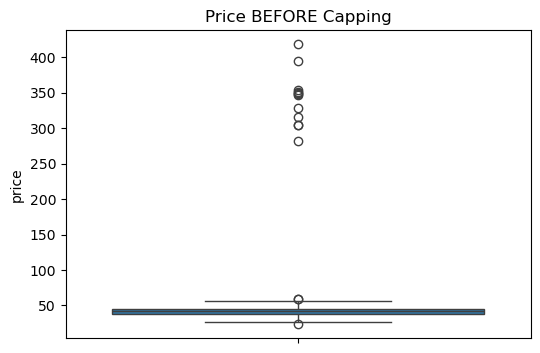

Q1: 38.0, Q3: 45.7, IQR: 7.700000000000003
Capping values above: 57.25000000000001


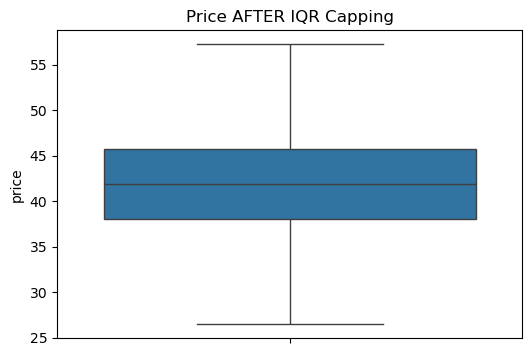

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.385
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                     315.5
Date:                Mon, 26 Jan 2026   Prob (F-statistic):           3.56e-55
Time:                        22:27:06   Log-Likelihood:                -1485.8
No. Observations:                 506   AIC:                             2976.
Df Residuals:                     504   BIC:                             2984.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.4458      1.906      4.432      0.0

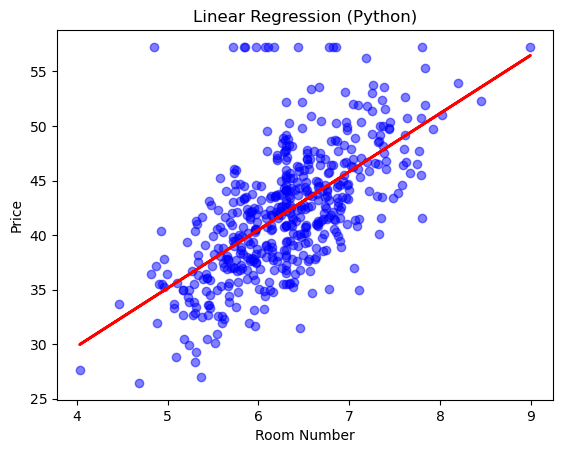

In [15]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Load Data ---
df = pd.read_csv('/home/malve/development/AI/machine-learning-python-r/House_Price_Data_Dirty.csv', header=0)

# --- 2. Missing Value Treatment (Imputation) ---
# Calculate mean
mean_room = df['room_num'].mean()
# Fill NA values
df['room_num'] = df['room_num'].fillna(mean_room)

print("Missing values filled.")

# --- 3. Outlier Treatment (The IQR Method) ---

# Step A: Visualizing before (optional)
plt.figure(figsize=(6, 4))
sns.boxplot(y=df['price'])
plt.title("Price BEFORE Capping")
plt.show()

# Step B: Calculate Quartiles and IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")

# Step C: Define Upper Limit
# Formula: Q3 + 1.5 * IQR
upper_limit = Q3 + (1.5 * IQR)
lower_limit = Q1 - (1.5 * IQR) # (Optional, if you had low outliers)

print(f"Capping values above: {upper_limit}")

# Step D: Apply Capping (Winsorization)
# Logic: Locate rows where price > upper_limit, and set them to upper_limit
df.loc[df['price'] > upper_limit, 'price'] = upper_limit
# (Optional) Cap lower limit too
df.loc[df['price'] < lower_limit, 'price'] = lower_limit

# Step E: Visualizing after
plt.figure(figsize=(6, 4))
sns.boxplot(y=df['price'])
plt.title("Price AFTER IQR Capping")
plt.show()

# --- 4. Verify Linear Relationship (Statsmodels) ---
# To mimic R's 'lm' summary, we use statsmodels

# Define X (Predictor) and y (Target)
X = df['room_num']
y = df['price']

# CRITICAL STEP IN PYTHON:
# Statsmodels does not add a constant (Intercept) by default. You must add it manually.
X = sm.add_constant(X)

# Build the model (OLS = Ordinary Least Squares, same as 'lm')
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())

# Plotting the result
plt.scatter(df['room_num'], df['price'], color='blue', alpha=0.5)
# Plot regression line
# Formula: y = mx + c (slope * x + intercept)
y_pred = model.params['room_num'] * df['room_num'] + model.params['const']
plt.plot(df['room_num'], y_pred, color='red', linewidth=2)
plt.xlabel("Room Number")
plt.ylabel("Price")
plt.title("Linear Regression (Python)")
plt.show()

# Multiple Linear Regression

In [16]:
import statsmodels.api as sn

In [17]:
X_multi = df.drop("price", axis=1)

In [18]:
X_multi.head()

,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
0,1.80618,36.17,0.8106,6.648,16.3,9.64,9.38,9.49,9.35,22.2,7.32,NO,8.9220,10.7301,Lake,43,YES,0.055809
1,3.09492,33.64,0.4008,6.203,32.4,8.13,8.28,8.04,8.00,22.6,23.66,NO,7.9928,14.6903,Lake and River,33,YES,0.056266
2,2.24219,48.45,0.7182,6.753,42.8,6.43,6.43,5.98,6.23,24.2,34.05,YES,7.0707,14.5882,Lake and River,24,YES,0.048622
3,3.94571,53.24,0.4256,7.366,92.4,5.44,5.13,5.51,5.09,22.1,20.55,NO,9.7897,14.4373,NaN,37,YES,0.075728
4,0.25546,49.32,0.5288,6.136,99.4,1.36,1.46,1.31,1.38,22.4,25.59,YES,7.7056,13.1272,Lake and River,38,YES,0.086171


In [19]:
y_multi = df["price"]

In [20]:
y_multi.head()

0    40.9
1    37.6
2    44.0
3    43.5
4    41.8
Name: price, dtype: float64

In [21]:
X_multi_cons = sn.add_constant(X_multi)

In [22]:
X_multi_cons.head()

,const,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
0,1.0,1.80618,36.17,0.8106,6.648,16.3,9.64,9.38,9.49,9.35,22.2,7.32,NO,8.9220,10.7301,Lake,43,YES,0.055809
1,1.0,3.09492,33.64,0.4008,6.203,32.4,8.13,8.28,8.04,8.00,22.6,23.66,NO,7.9928,14.6903,Lake and River,33,YES,0.056266
2,1.0,2.24219,48.45,0.7182,6.753,42.8,6.43,6.43,5.98,6.23,24.2,34.05,YES,7.0707,14.5882,Lake and River,24,YES,0.048622
3,1.0,3.94571,53.24,0.4256,7.366,92.4,5.44,5.13,5.51,5.09,22.1,20.55,NO,9.7897,14.4373,NaN,37,YES,0.075728
4,1.0,0.25546,49.32,0.5288,6.136,99.4,1.36,1.46,1.31,1.38,22.4,25.59,YES,7.7056,13.1272,Lake and River,38,YES,0.086171


In [23]:
# Encode categorical variables to handle object dtypes
X_multi_encoded = pd.get_dummies(X_multi, drop_first=True).astype(int)
X_multi_cons = sn.add_constant(X_multi_encoded)

lm_multi = sn.OLS(y_multi, X_multi_cons).fit()